## Importing relevant Libraries

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression

## Importing the Dataset

In [45]:
#importing the Appliances Energy Prediction data into a dataframe
energydata_df = pd.read_csv('energydata_complete.csv')

In [46]:
energydata_df.head(20)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.530000,6.600000,733.500000,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.560000,6.483333,733.600000,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.500000,6.366667,733.700000,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.250000,733.800000,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.400000,6.133333,733.900000,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
5,2016-01-11 17:50:00,50,40,19.890000,46.026667,19.200000,44.500000,19.790000,44.933333,18.890000,...,17.000000,45.290000,6.016667,734.000000,92.000000,5.333333,43.833333,4.800000,44.919484,44.919484
6,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.790000,44.900000,18.890000,...,17.000000,45.290000,5.900000,734.100000,92.000000,5.000000,40.000000,4.700000,47.233763,47.233763
7,2016-01-11 18:10:00,60,50,19.856667,45.560000,19.200000,44.500000,19.730000,44.900000,18.890000,...,17.000000,45.290000,5.916667,734.166667,91.833333,5.166667,40.000000,4.683333,33.039890,33.039890
8,2016-01-11 18:20:00,60,40,19.790000,45.597500,19.200000,44.433333,19.730000,44.790000,18.890000,...,17.000000,45.290000,5.933333,734.233333,91.666667,5.333333,40.000000,4.666667,31.455702,31.455702
9,2016-01-11 18:30:00,70,40,19.856667,46.090000,19.230000,44.400000,19.790000,44.863333,18.890000,...,17.000000,45.290000,5.950000,734.300000,91.500000,5.500000,40.000000,4.650000,3.089314,3.089314


In [47]:
energydata_df.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [48]:
energydata_df.copy()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [49]:
# renamng the columns of the dataset

column_names = {'T1': 'Kitchen_Temp', 'RH_1': 'Kitchen_Humidity', 'T2': 'Living_Room_Temp', 'RH_2': 'Living_Room_Humidity', 
                'T3': 'Laundry_Room_Temp', 'RH_3': 'Laundry_Room_Humidity', 'T4': 'Office_Room_Temp', 
                'RH_4': 'Office_Room_Humidity', 'T5': 'Bathroom_Room_Temp', 'RH_5': 'Bathroom_Room_Humidity',  
                'T6': 'Outside_buiding_Temp', 'RH_6': 'Outside_buiding_Humidity', 'T7': 'Ironing_room_Temp', 
               'RH_7': 'Ironing_Room_Humidity', 'T8': 'Teenage_Room_Temp', 'RH_8': 'Teenage_Room_Humidity', 
                'T9': 'Parent_Room_Temp', 'RH_9': 'Parent_Room_Humidity', 'T_out':'Temperature_outside', 
                'Press_mm_hg': 'Pressure_outside', 'RH_out': 'Humidity_outside', 'rv1': 'Random_variable1', 'rv2': 'Random_variable2'}
energydata_df = energydata_df.rename(columns = column_names)

In [50]:
energydata_df

,date,Appliances,lights,Kitchen_Temp,Kitchen_Humidity,Living_Room_Temp,Living_Room_Humidity,Laundry_Room_Temp,Laundry_Room_Humidity,Office_Room_Temp,...,Parent_Room_Temp,Parent_Room_Humidity,Temperature_outside,Pressure_outside,Humidity_outside,Windspeed,Visibility,Tdewpoint,Random_variable1,Random_variable2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [51]:
energydata_df.describe()

,Appliances,lights,Kitchen_Temp,Kitchen_Humidity,Living_Room_Temp,Living_Room_Humidity,Laundry_Room_Temp,Laundry_Room_Humidity,Office_Room_Temp,Office_Room_Humidity,...,Parent_Room_Temp,Parent_Room_Humidity,Temperature_outside,Pressure_outside,Humidity_outside,Windspeed,Visibility,Tdewpoint,Random_variable1,Random_variable2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [52]:
# selecting a sample of the dataset
simple_linear_reg_df = energydata_df[['Appliances', 'Living_Room_Temp']].sample(15, random_state = 2)

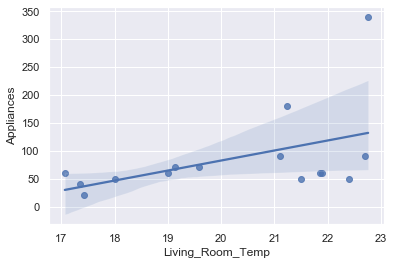

In [53]:
# regression plot
sns.regplot(x ='Living_Room_Temp', y ='Appliances', data = simple_linear_reg_df)

In [54]:
energydata_df = energydata_df.drop(['date', 'lights'], axis = 1)

In [55]:
energydata_df

,Appliances,Kitchen_Temp,Kitchen_Humidity,Living_Room_Temp,Living_Room_Humidity,Laundry_Room_Temp,Laundry_Room_Humidity,Office_Room_Temp,Office_Room_Humidity,Bathroom_Room_Temp,...,Parent_Room_Temp,Parent_Room_Humidity,Temperature_outside,Pressure_outside,Humidity_outside,Windspeed,Visibility,Tdewpoint,Random_variable1,Random_variable2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


## Normalization of the dataset

In [56]:
#  normalising the Appliances Energy Prediction dataset to a common scale using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
Scaler = MinMaxScaler()
normalised_energydata_df = pd.DataFrame(Scaler.fit_transform(energydata_df), columns = energydata_df.columns)
features_df = normalised_energydata_df.drop(columns= ['Appliances'])
appliances_target = normalised_energydata_df['Appliances']

In [57]:
features_df.shape

(19735, 26)

In [58]:
appliances_target.shape

(19735,)

## Splitting the dataset into train and test set

In [59]:
# splitting the normalised dataset into training and testing dataset. 
# We have already divide the dataset into features and target variables
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features_df, appliances_target, test_size = 0.3, random_state = 42)

## Implementing Linear Regression

In [60]:
linear_model = LinearRegression()

In [61]:
# fitting the model to the training dataset
linear_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
# obtaining prediction
predicted_test = linear_model.predict(x_test)
predicted_test

array([0.03322207, 0.24411599, 0.03400024, ..., 0.06844707, 0.10032325,
       0.05722198])

In [63]:
predicted_train = linear_model.predict(x_train)
predicted_train

array([0.03736239, 0.08440778, 0.02815806, ..., 0.04623579, 0.08713294,
       0.07302946])

## Measuring Regression Performance

In [64]:
# Obtaining Mean Absolute Error(MAE) on a train
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_train, predicted_train)
round(mae, 3)

0.05

In [65]:
mae = mean_absolute_error(y_test, predicted_test)
round(mae, 3)

0.05

In [66]:
# Obtaining R-Squared on a train data
from sklearn.metrics import r2_score
r_squared = r2_score(y_train, predicted_train)
round(r_squared, 3)

0.145

In [67]:
# Obtaining R-Squared on a test data
r_squared = r2_score(y_test, predicted_test)
round(r_squared, 3)

0.149

In [68]:
# Obtaining Residual Sum of Squares on a train data
rss = np.sum(np.square(y_train - predicted_train))
round(rss, 3)

109.388

In [69]:
# Obtaining Residual Sum of Squares on a test data
rss = np.sum(np.square(y_test - predicted_test))
round(rss, 3)

45.348

In [70]:
# Obtaining Root Mean Square Error(RMSE) on a train data
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_train, predicted_train))
round(rmse, 3)

0.089

In [71]:
# Obtaining Root Mean Square Error(RMSE) on a test data
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_test))
round(rmse, 3)

0.088

## Parameters of Linear Regression

In [72]:
print('Estimated intercept:', linear_model.intercept_)

Estimated intercept: 0.15290295882253055


In [73]:
#17
pd.DataFrame(zip(features_df.columns, linear_model.coef_), columns = ['Features', 'Estimated Coefficient'])

,Features,Estimated Coefficient
0,Kitchen_Temp,-0.003281
1,Kitchen_Humidity,0.553547
2,Living_Room_Temp,-0.236178
3,Living_Room_Humidity,-0.456698
4,Laundry_Room_Temp,0.290627
5,Laundry_Room_Humidity,0.096048
6,Office_Room_Temp,0.028981
7,Office_Room_Humidity,0.026386
8,Bathroom_Room_Temp,-0.015657
9,Bathroom_Room_Humidity,0.016006


Text(0, 0.5, 'Residuals')

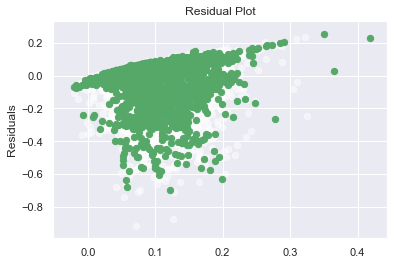

In [74]:
# Residual plot
plt.scatter(linear_model.predict(x_train), linear_model.predict(x_train)- y_train, c='w', s = 40, alpha = 0.5)
plt.scatter(linear_model.predict(x_test), linear_model.predict(x_test)- y_test, c='g', s = 40)
plt.title('Residual Plot')
plt.ylabel('Residuals')

In [75]:
# Arranging and calculating the Residuals
residuals = pd.DataFrame({
    'fitted values' : y_test,
    'predicted values' : predicted_test,
})
residuals['residuals'] = residuals['fitted values'] - residuals['predicted values']
residuals.head()

,fitted values,predicted values,residuals
8980,0.028037,0.033222,-0.005185
2754,0.074766,0.244116,-0.169350
9132,0.037383,0.034000,0.003383
14359,0.037383,0.105377,-0.067994
8875,0.056075,0.023360,0.032715


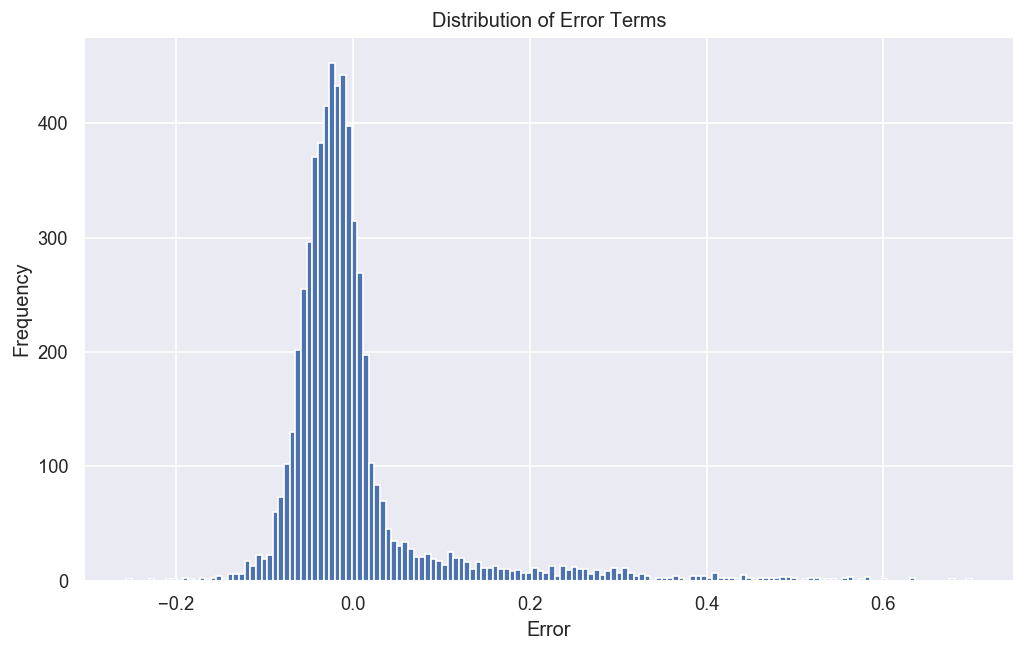

In [76]:
# Histogram for distribution
plt.figure(figsize=(10, 6), dpi=120, facecolor='w', edgecolor='b')
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

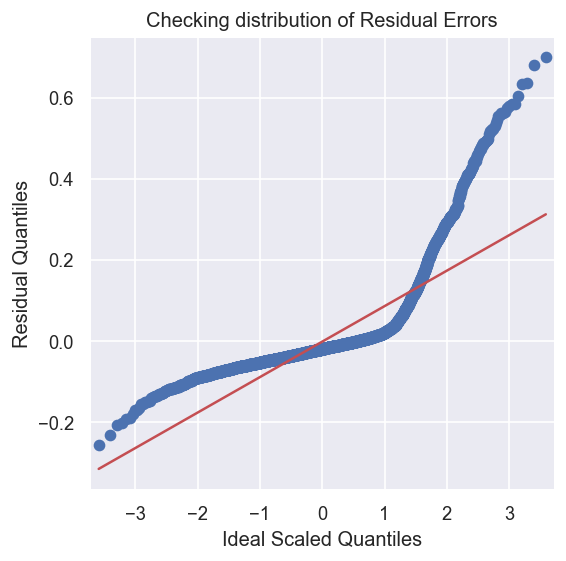

In [77]:
# importing the QQ-plot from the from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## Plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5) , dpi = 120)
qqplot(residuals.residuals, line = 's' , ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

In [78]:
# Importing Variance_inflation_Factor funtion from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the not Catagorical)
VIF = pd.Series([variance_inflation_factor(normalised_energydata_df.values, i) for i in range(normalised_energydata_df.shape[1])], index =normalised_energydata_df.columns)
VIF

C:\Users\Olanrewaju\anaconda33\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Appliances                    2.022781
Kitchen_Temp                200.525620
Kitchen_Humidity            195.719396
Living_Room_Temp            132.006215
Living_Room_Humidity        505.425570
Laundry_Room_Temp            75.921744
Laundry_Room_Humidity       123.141124
Office_Room_Temp             79.697039
Office_Room_Humidity        130.414402
Bathroom_Room_Temp           64.844857
Bathroom_Room_Humidity        8.816585
Outside_buiding_Temp        210.725739
Outside_buiding_Humidity     39.363781
Ironing_room_Temp           110.808561
Ironing_Room_Humidity        72.268399
Teenage_Room_Temp            75.677093
Teenage_Room_Humidity        62.977151
Parent_Room_Temp            171.704044
Parent_Room_Humidity         63.702341
Temperature_outside         365.766211
Pressure_outside             17.729738
Humidity_outside            180.430232
Windspeed                     5.266190
Visibility                   11.449097
Tdewpoint                   138.630437
Random_variable1         

Text(0.5, 1.0, 'Coefficient plot')

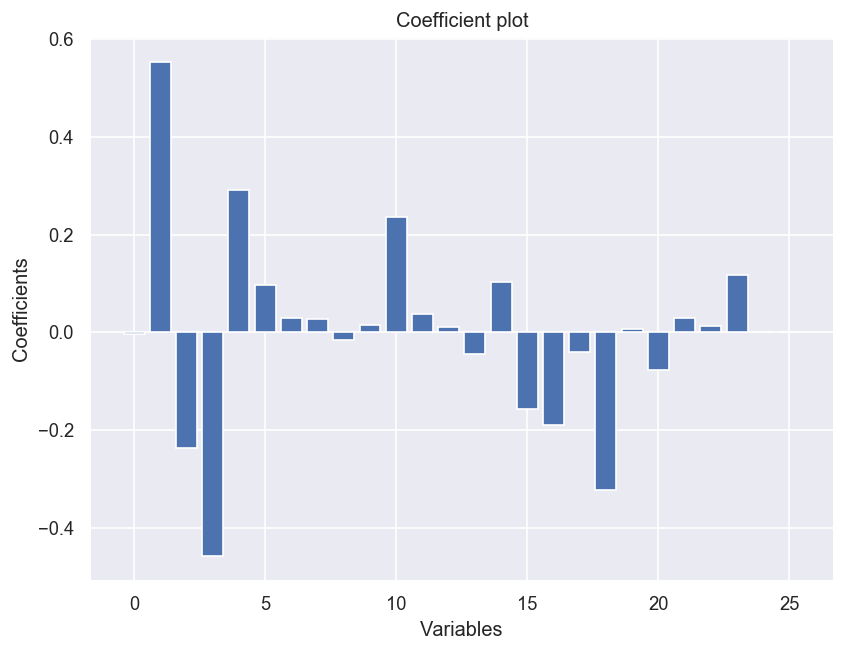

In [79]:
plt.figure(figsize=(8, 6), dpi=120, facecolor='w', edgecolor='b')
x = range(len(x_train.columns))
y = linear_model.coef_
plt.bar( x, y )
plt.xlabel( "Variables")
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

## Regularisation of the model

In [80]:
# LASSO REGRESSION
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [81]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.5)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.5, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [82]:
 # Elasic Net Regression
from sklearn.linear_model import ElasticNet
elasticnet_reg = ElasticNet(alpha = 0.0001)
elasticnet_reg.fit(x_train, y_train)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [83]:
# COMPARING THE EFFECT OF REGULARISATION

def get_weights_df(model, feat, col_name): # this function returns the weight of every features
    weights = pd.Series(model.coef_, feat.columns).sort_values()
    weights_df = pd.DataFrame(weights).reset_index()
    weights_df.columns = ['Features', col_name]
    weights_df[col_name].round(3)
    return weights_df

In [84]:
linear_model_weights = get_weights_df(linear_model, x_train, 'Linear_Model_Weight')
ridge_weights_df = get_weights_df(ridge_reg, x_train, 'Ridge_Weight')
lasso_weights_df = get_weights_df(lasso_reg, x_train, 'Lasso_Weight')
elasticnet_weights_df = get_weights_df(elasticnet_reg, x_train, 'ElasticNet_weight')

In [85]:
final_weights = pd.merge(linear_model_weights, ridge_weights_df, on = 'Features')
final_weights = pd.merge(final_weights, lasso_weights_df, on = 'Features')
final_weights =pd.merge(final_weights, elasticnet_weights_df, on = 'Features')

In [86]:
#19
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_Weight,ElasticNet_weight
0,Living_Room_Humidity,-0.456698,-0.401134,-0.000000,-0.235623
1,Temperature_outside,-0.321860,-0.250765,0.000000,-0.057489
2,Living_Room_Temp,-0.236178,-0.193880,0.000000,-0.055971
3,Parent_Room_Temp,-0.189941,-0.188584,-0.000000,-0.170006
4,Teenage_Room_Humidity,-0.157595,-0.156596,-0.000110,-0.148538
5,Humidity_outside,-0.077671,-0.050541,-0.049557,-0.000000
6,Ironing_Room_Humidity,-0.044614,-0.046291,-0.000000,-0.045970
7,Parent_Room_Humidity,-0.039800,-0.041701,-0.000000,-0.035010
8,Bathroom_Room_Temp,-0.015657,-0.020727,-0.000000,-0.025402
9,Kitchen_Temp,-0.003281,-0.021549,0.000000,-0.047762


In [87]:
energydata_df.copy()

,Appliances,Kitchen_Temp,Kitchen_Humidity,Living_Room_Temp,Living_Room_Humidity,Laundry_Room_Temp,Laundry_Room_Humidity,Office_Room_Temp,Office_Room_Humidity,Bathroom_Room_Temp,...,Parent_Room_Temp,Parent_Room_Humidity,Temperature_outside,Pressure_outside,Humidity_outside,Windspeed,Visibility,Tdewpoint,Random_variable1,Random_variable2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [89]:
data = energydata_df.copy()

In [90]:
data

,Appliances,Kitchen_Temp,Kitchen_Humidity,Living_Room_Temp,Living_Room_Humidity,Laundry_Room_Temp,Laundry_Room_Humidity,Office_Room_Temp,Office_Room_Humidity,Bathroom_Room_Temp,...,Parent_Room_Temp,Parent_Room_Humidity,Temperature_outside,Pressure_outside,Humidity_outside,Windspeed,Visibility,Tdewpoint,Random_variable1,Random_variable2
0,60,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,60,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,50,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,50,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,60,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,90,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,270,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,420,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [91]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.4)
ridge_reg.fit(x_train, y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [93]:
# Obtaining Root Mean Square Error(RMSE) on a train data
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train, y_train)

predicted_test = lasso_reg.predict(x_test)
predicted_test
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_test))
round(rmse, 3)

0.094

In [94]:
# RIDGE REGRESSION
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 0.4)
ridge_reg.fit(x_train, y_train)
predicted_test = ridge_reg.predict(x_test)
predicted_test
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test, predicted_test))
round(rmse, 3)

0.088